# Data Preparation

The dataset has been cleaned according to our README.md, and is ready to be analysed. If the process of data cleaning is of any interest, the process is found in data_engineering.ipynb

In [12]:
import pandas as pd

from DataExploration import *
from DataExploration import descriptive_statistics as ds
from DataExploration import plots as pl
import ShowLinearRegression as slr
import ShowClassification as sc

In [13]:
df = pd.read_csv("data/cleaned_sales_data.csv")

In [14]:
ds.describe_data(df, verbose=False, round_digits=2)

,count,mean,std,min,25%,50%,75%,max
feature,,,,,,,,
datetime,8950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,8950,4.631285,1.648495,2.0,3.0,5.0,6.0,7.0
order_id,8950,14187.461341,6945.131456,913.0,7803.25,16092.5,20381.75,24712.0
order_total,8950,379.735592,281.788275,-623.0,238.0,323.0,456.0,5229.0
payment_method,8950,2.568492,1.218617,1.0,2.0,2.0,4.0,4.0
number_of_maindishes,8950,2.178492,2.190671,-5.0,1.0,2.0,2.0,43.0
number_of_snacks,8950,0.881341,1.356026,-4.0,0.0,0.0,1.0,16.0
number_of_drinks,8950,0.748939,2.548389,-3.0,0.0,0.0,1.0,53.0
number_of_soups,8950,0.101453,0.380829,0.0,0.0,0.0,0.0,5.0


In [15]:
df = df.drop(['datetime', 'order_id'], axis=1, inplace=False)

We have removed the columns 'datetime' and 'order_id' as they are not relevant for our data analysis.

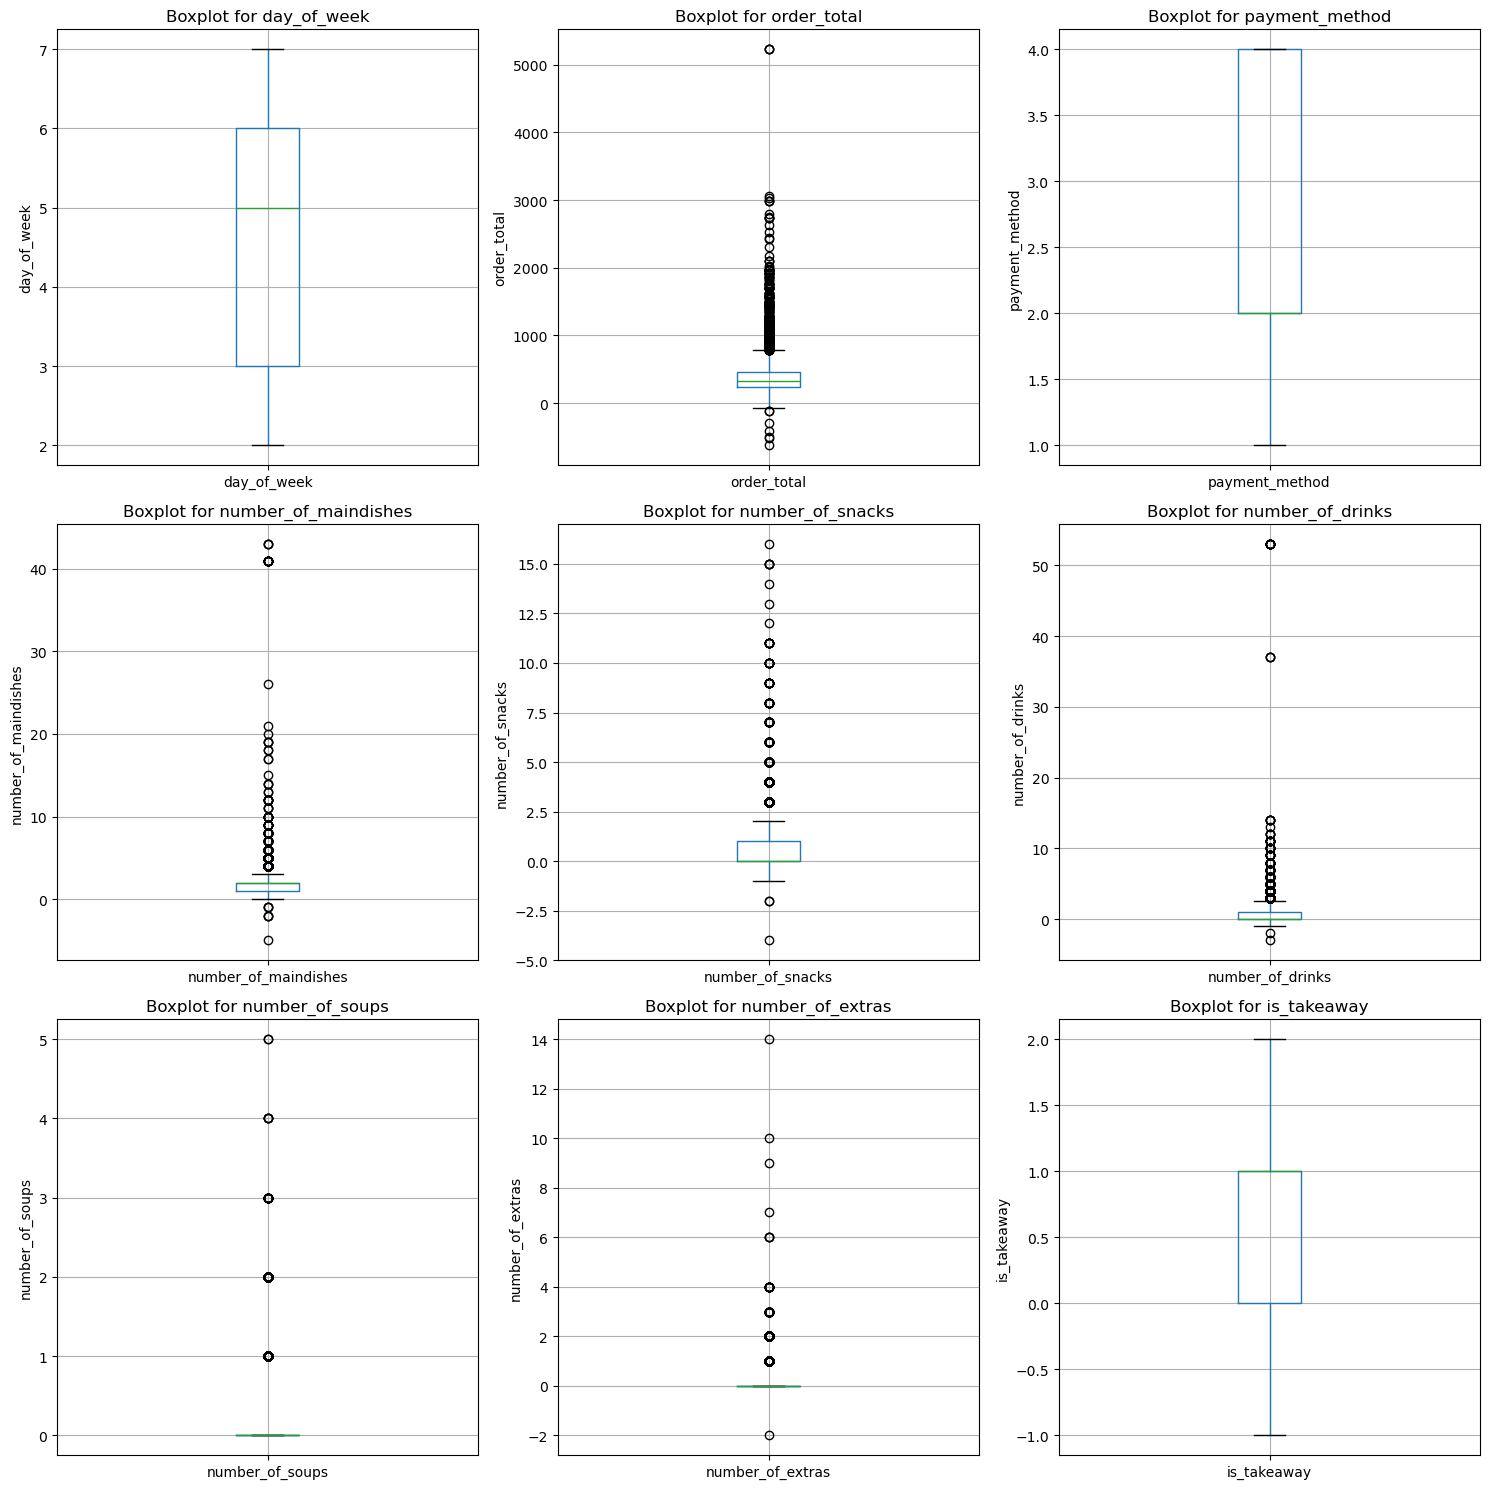

In [16]:
pl.show_boxplots(df, layout='grid')

In [17]:
# Show all rows where any value is negative
df[df.lt(0).any(axis=1)]

,day_of_week,order_total,payment_method,number_of_maindishes,number_of_snacks,number_of_drinks,number_of_soups,number_of_extras,is_takeaway
171,6,-38.0,4,0.0,0.0,-1.0,0.0,0.0,0.0
708,7,-410.0,4,-2.0,-4.0,0.0,0.0,0.0,-1.0
2359,5,-118.0,4,0.0,-1.0,-1.0,0.0,0.0,0.0
2415,6,-298.0,4,-2.0,0.0,0.0,0.0,0.0,0.0
2796,3,-39.0,4,-1.0,0.0,0.0,0.0,0.0,0.0
3423,6,-69.0,4,0.0,-1.0,0.0,0.0,0.0,0.0
3442,7,-69.0,4,0.0,-1.0,0.0,0.0,0.0,0.0
4842,6,-506.0,4,-2.0,-2.0,-2.0,0.0,-2.0,0.0
6671,7,-623.0,4,-5.0,-2.0,0.0,0.0,0.0,0.0
6759,3,-119.0,4,-1.0,0.0,0.0,0.0,0.0,0.0


In [18]:
df = df.drop(df[df.lt(0).any(axis=1)].index)
df['is_takeaway'] = (df['is_takeaway'] > 0).astype(int)

We found outliers in terms of negative values in our data from our boxplots, and these have been removed from the dataset.
order_total, maindishes and snacks have some outliers, but these are confirmed from the restaurant as normal/valid orders, and thus included in the dataset for now.

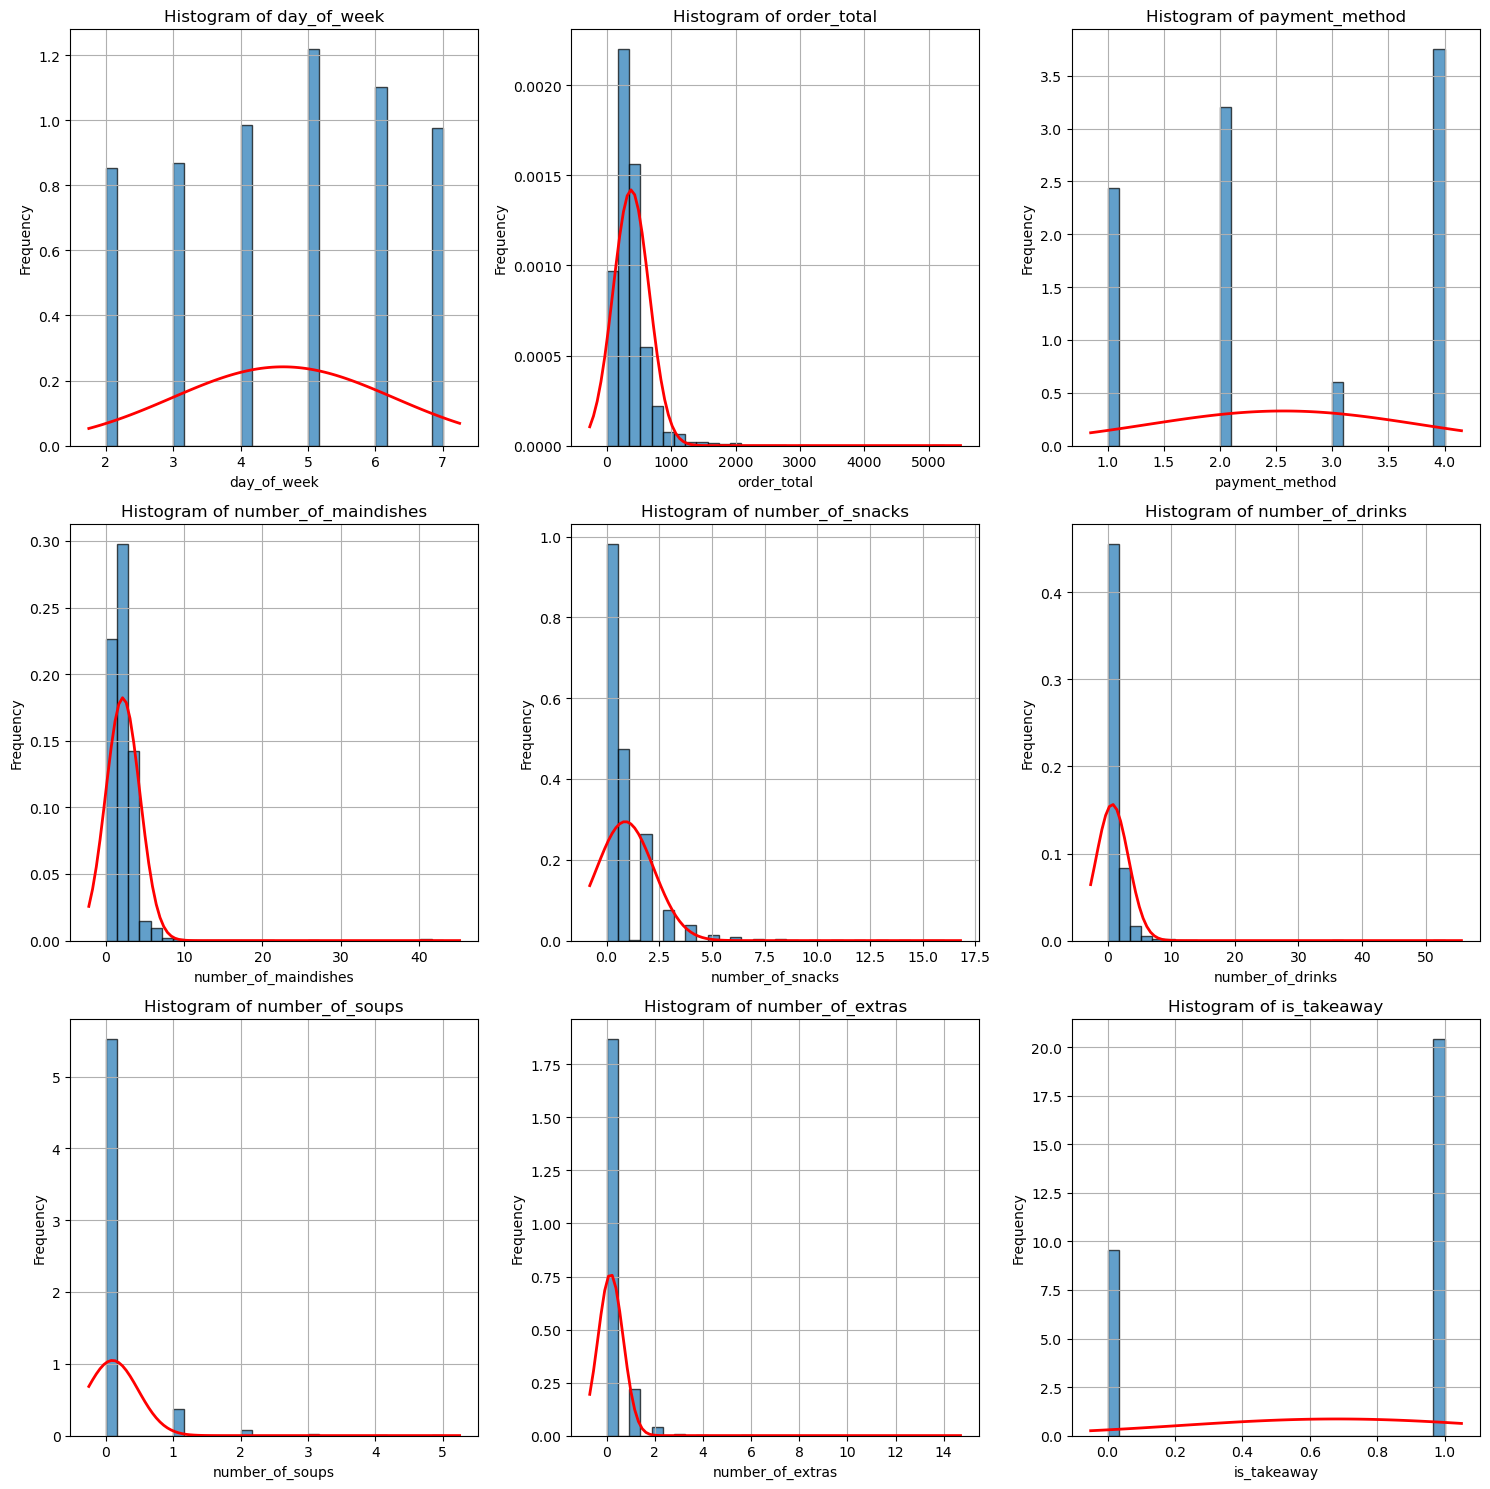

In [19]:
pl.show_histograms(df, layout='grid', bell_curve=True, bins=30)

Looking at the histograms we see close to normal distribution on the order_total plot.

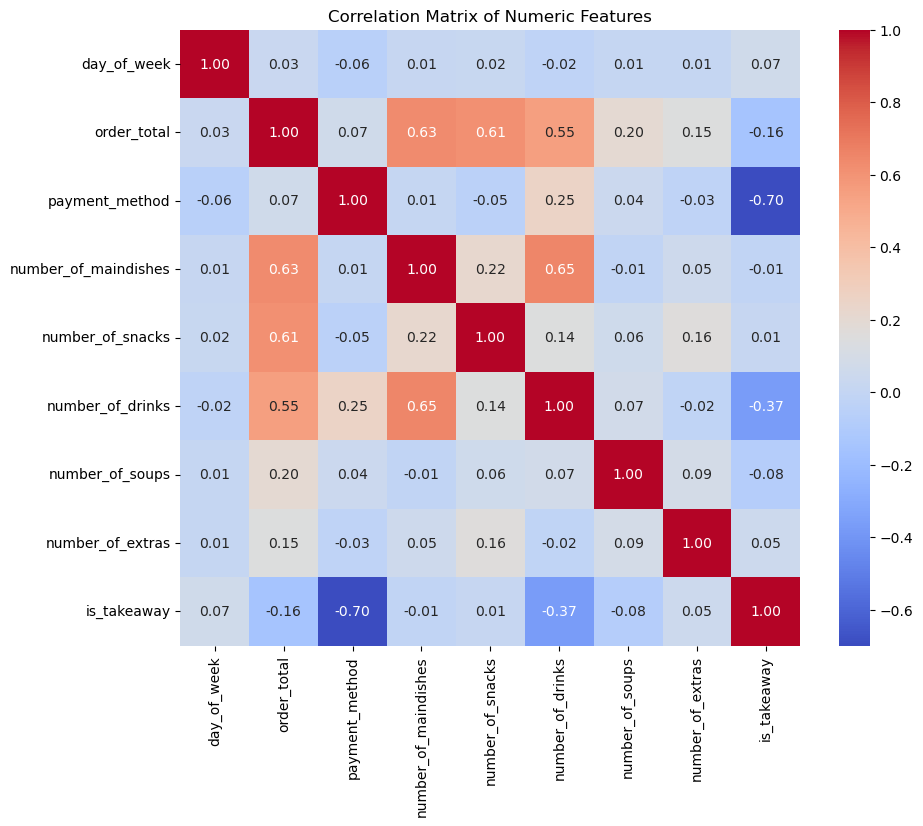

In [20]:
pl.show_correlation_heatmap(df)

From out correlation heatmap we can see correlation between snacks, drinks, maindishes when looking at order_total. While looking at payment_method we see a correlation with is_takeaway.
We would like to look further at number_of_drinks to see if we can make a model using linear regression to predict when people buy an extra beverage.
Our dependant variable is number of drinks, and independant values are number_of_maindishes and is_takeaway

In [21]:
slr.show_model(df, ['number_of_maindishes', 'is_takeaway'], ['number_of_drinks'], test_size=0.2, random_state=42)

The model is a hyperplane:
	y = 0.74*number_of_maindishes + -2.00*is_takeaway + 0.49
Mean Absolute Error  0.8453164074594787
Mean Squared Error  2.5903381191777357
Root Mean Squared Error  1.60945273903204
Explained variance score  0.55
R2 score  0.5521642774059563


([array([ 0.74095362, -1.99569667])],
 array([0.48730872]),
 0.8453164074594787,
 2.5903381191777357,
 np.float64(1.60945273903204),
 0.55,
 0.5521642774059563,
 LinearRegression())

Looking at the multiple linear regression model, we see a variance score of 0.55 or 55% which we conclude not to be the best model.

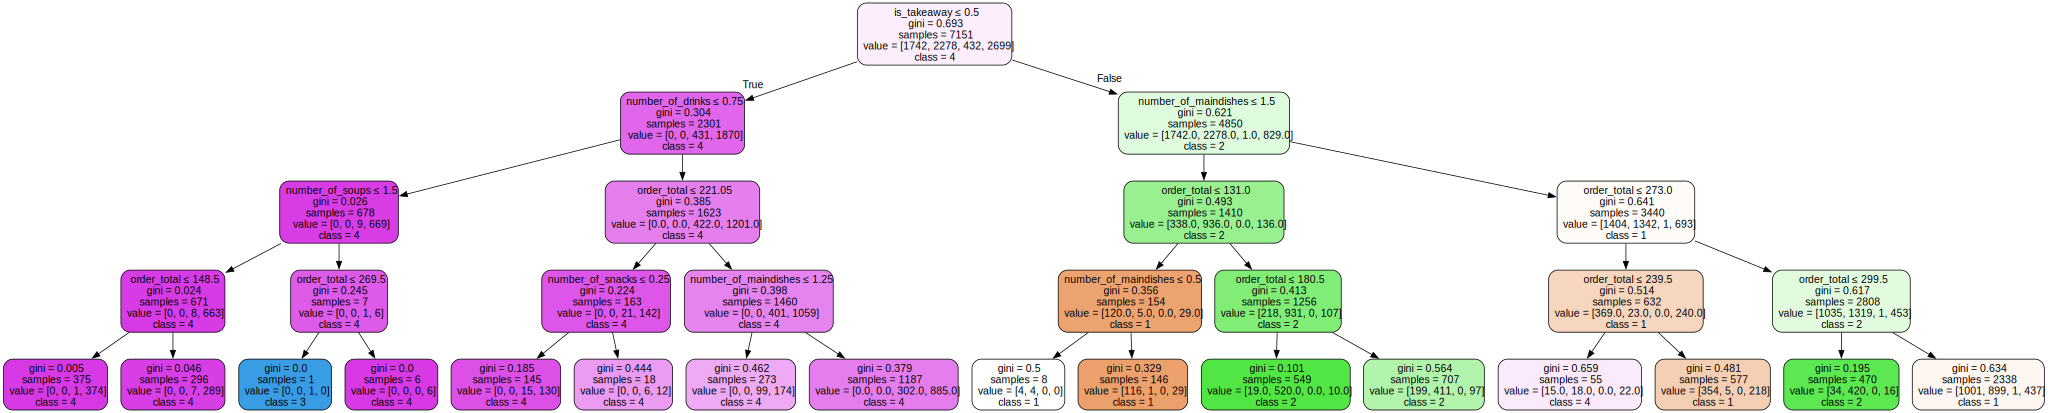

Accuracy: 0.651565995525727
Confusion Matrix:
 [[372  66   0   2]
 [242 341   0   2]
 [  0   1   0 107]
 [168  33   2 452]]


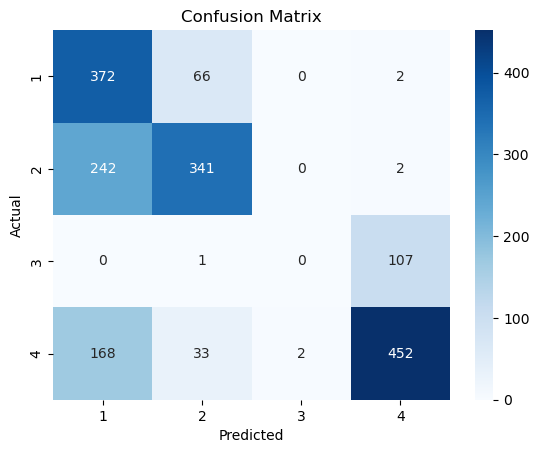

(DecisionTreeClassifier(max_depth=4, random_state=42),
 0.651565995525727,
 array([[372,  66,   0,   2],
        [242, 341,   0,   2],
        [  0,   1,   0, 107],
        [168,  33,   2, 452]]))

In [22]:
sc.show_decision_tree(df, 'payment_method', max_depth=4)